#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import Image
import os
!ls /kaggle/input/lab5-images

Dr_Shashi_Tharoor.jpg  Plaksha_Faculty.jpg


In [4]:
import wandb

wandb.init(project='distance_classification_project')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


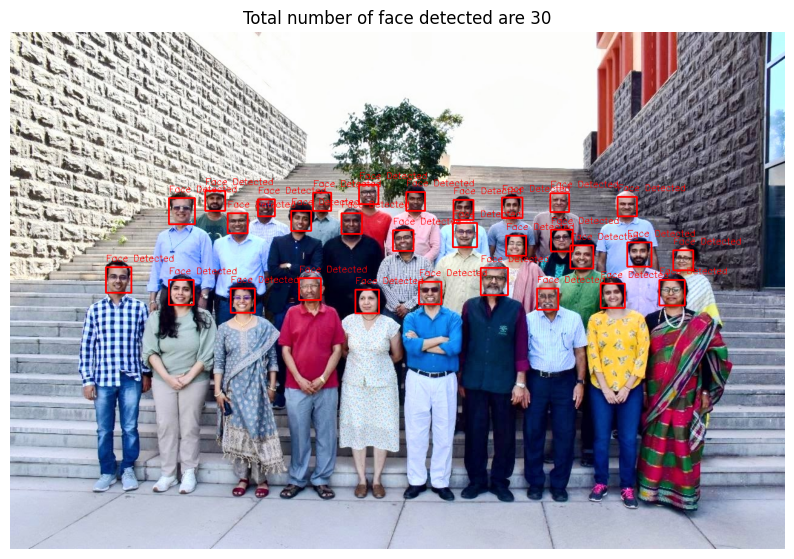

In [6]:
# Read the image
img_path = "/kaggle/input/lab5-images/Plaksha_Faculty.jpg"
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not open or read the image at {img_path}.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Loading the required haar-cascade xml classifier file
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Applying the face detection method on the grayscale image.
    faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

    # Define the text and font parameters
    text = "Face Detected"  
    font = cv2.FONT_HERSHEY_SIMPLEX  
    font_scale = 0.5  
    font_color = (0, 0, 255)  # Red color in BGR format
    font_thickness = 1  

    # Iterating through rectangles of detected faces
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(f"Total number of face detected are {len(faces_rect)}")
    plt.axis('off')  # Turn off axis
    plt.show()
    wandb.log({"Detected Faces": wandb.Image(img_rgb, caption=f"Total Faces Detected: {len(faces_rect)}")})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


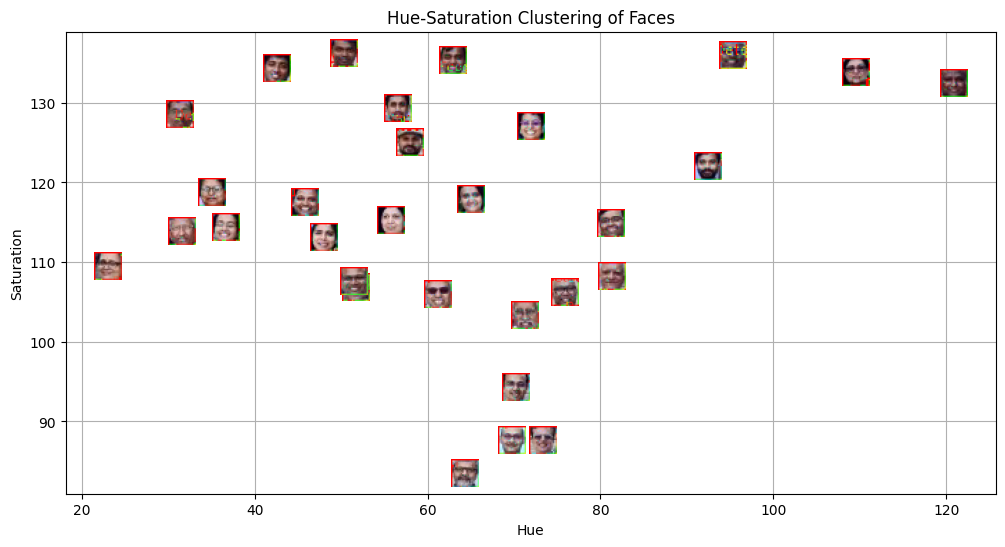

<Figure size 640x480 with 0 Axes>

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
kmeans.fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
ax.set_xlabel('Hue')

## Put y label
ax.set_ylabel('Saturation')

## Put title
ax.set_title('Hue-Saturation Clustering of Faces')

## Put grid
ax.grid(True)

## Show the plot
plt.show()

plt.savefig("hue_saturation_clustering.png")
plt.show()

wandb.log({"Clustering Plot": wandb.Image("hue_saturation_clustering.png")})

for i, face in enumerate(face_images):
    face_rgb = cv2.cvtColor(face, cv2.COLOR_HSV2RGB)  # Convert face to RGB for wandb
    wandb.log({f"Face {i+1}": wandb.Image(face_rgb, caption=f"Cluster: {kmeans.labels_[i]}")})



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


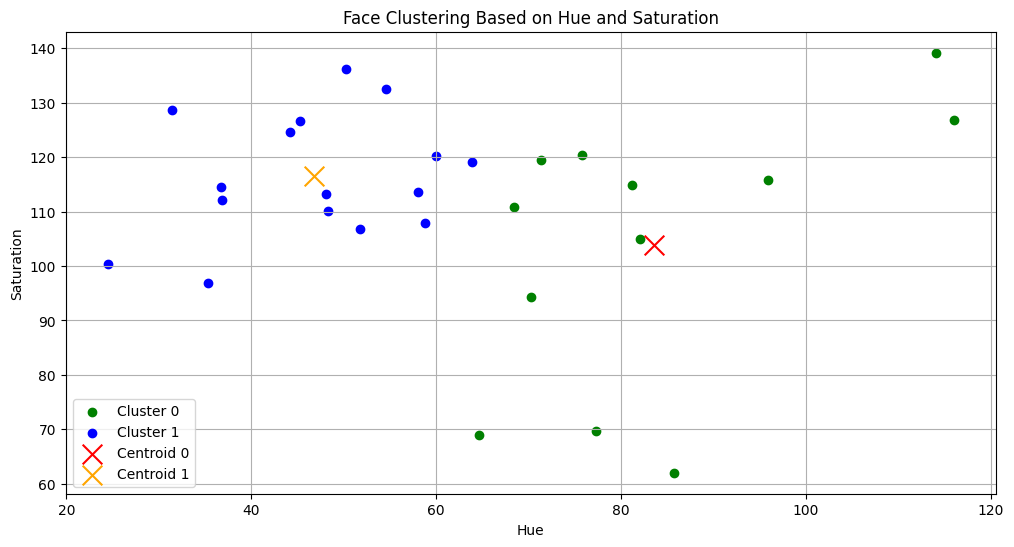

In [12]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Assuming gray_img is defined elsewhere in your code
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25, 25), maxSize=(50, 50))

# Ensure that faces_rect is defined before using it
if 'faces_rect' not in locals():
    raise ValueError("Error: 'faces_rect' is not defined. Ensure face detection is run before clustering.")

# Convert img to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract face region features (Hue and Saturation)
hue_saturation = []
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters for simplicity
kmeans.fit(hue_saturation)

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=200, label="Centroid 1")

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Face Clustering Based on Hue and Saturation")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.savefig("face_clustering.png")
plt.show()

wandb.log({"Clustering Plot": wandb.Image("face_clustering.png")})
wandb.log({"Number of Faces Detected": len(faces_rect)})

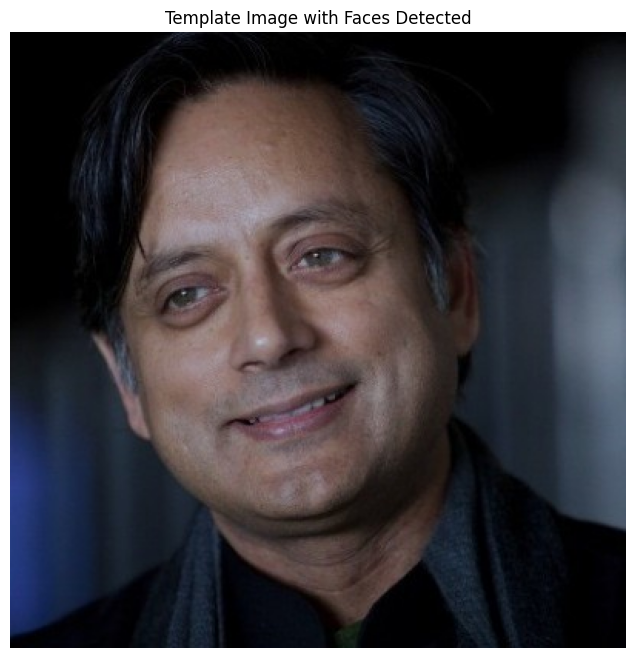

<Figure size 640x480 with 0 Axes>

In [16]:
# Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("/kaggle/input/lab5-images/Dr_Shashi_Tharoor.jpg")

# Check if the image was loaded successfully
if template_img is None:
    print("Error: Could not open or read the image.")
else:
    # Detect face in the template image after converting it to gray and store it in template_faces
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.05, minNeighbors=4, minSize=(25, 25), maxSize=(50, 50))

    # Draw rectangles around the detected faces
    for (x, y, w, h) in template_faces:
        cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Convert BGR to RGB for matplotlib
    template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    plt.imshow(template_img_rgb)
    plt.title('Template Image with Faces Detected')
    plt.axis('off')  
    plt.show()
    plt.savefig("template_face_detection.png")  
    wandb.log({"Template Image with Detected Faces": wandb.Image("template_face_detection.png")})
    wandb.log({"Number of Faces in Template": len(template_faces)})


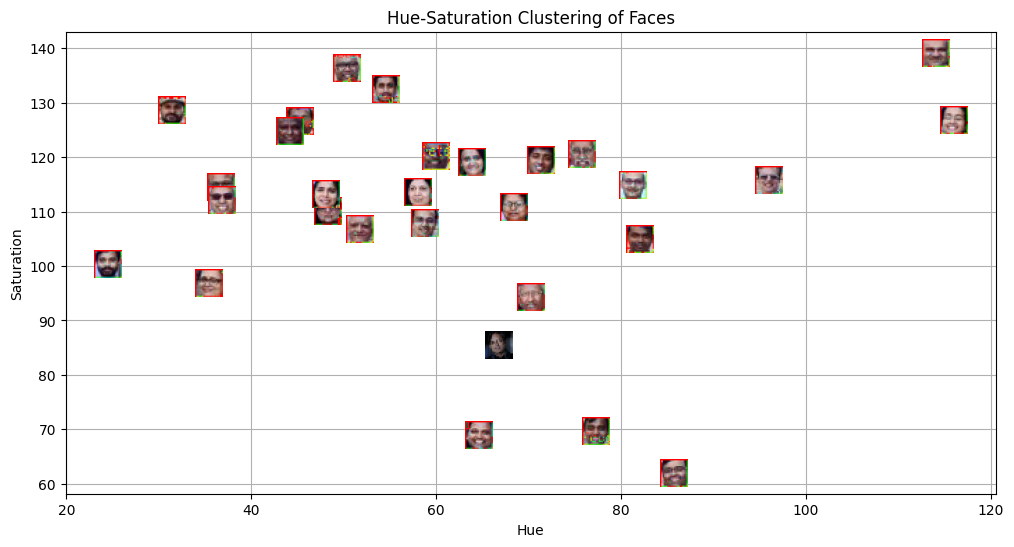

In [18]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict(np.array([[template_hue, template_saturation]]))[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
ax.set_xlabel('Hue')

## Put y label
ax.set_ylabel('Saturation')

## Put title
ax.set_title('Hue-Saturation Clustering of Faces')

## Add grid
ax.grid(True)

## Show plot
plt.savefig("template_clustering.png")
plt.show()

wandb.log({"Template Clustering Plot": wandb.Image("template_clustering.png")})
wandb.log({"Template Image Cluster": template_label})

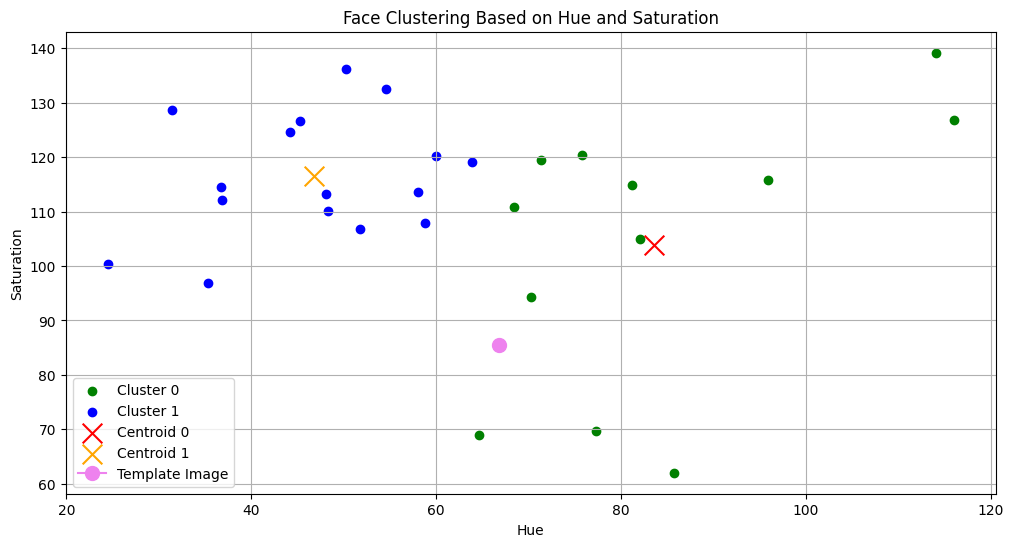

In [20]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=200, label="Centroid 0")  # plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=200, label="Centroid 1")  # plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Template Image')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Face Clustering Based on Hue and Saturation")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.savefig("final_face_clustering.png")
plt.show()

wandb.log({"Final Face Clustering Plot": wandb.Image("final_face_clustering.png")})
wandb.log({"Centroid 0 (Hue, Sat)": centroid_0.tolist()})
wandb.log({"Centroid 1 (Hue, Sat)": centroid_1.tolist()})
wandb.log({"Template Image Cluster Position": [template_hue, template_saturation]})

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 